In [1]:
# Клонирование репозитория YOLOv8
!git clone https://github.com/ultralytics/ultralytics.git
%cd ultralytics

# Установка необходимых зависимостей
# !pip install -r requirements.txt

# Убедимся, что пакет установлен корректно
!pip install -e .

Cloning into 'ultralytics'...
remote: Enumerating objects: 32979, done.
remote: Counting objects: 100% (1649/1649), done.
remote: Compressing objects: 100% (626/626), done.
remote: Total 32979 (delta 1218), reused 1384 (delta 1019), pack-reused 31330
Receiving objects: 100% (32979/32979), 16.03 MiB | 18.85 MiB/s, done.
Resolving deltas: 100% (23936/23936), done.
/content/ultralytics
Obtaining file:///content/ultralytics
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metad

In [2]:
# Импортируем необходимые модули
from ultralytics import YOLO

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="pY7jzsTq4nHhwqlfkEOF")
project = rf.workspace("valeriya-aleshnikova").project("plants_project")
version = project.version(6)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.70, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to plants_project-6 in yolov8:: 100%|██████████| 89800/89800 [00:24<00:00, 3593.56it/s]


In [4]:
import os

# Создайте папку, если она не существует
os.makedirs('/content/datasets/plants_project-6', exist_ok=True)


In [5]:
import shutil
import os

# Укажите путь, куда вы хотите переместить датасет
source_dir = "/content/ultralytics/plants_project-6"  # Путь, где датасет был загружен
destination_dir = "/content/datasets/plants_project-6"  # Целевая папка

# Переместите все содержимое из исходной папки в целевую
for item in os.listdir(source_dir):
    s = os.path.join(source_dir, item)
    d = os.path.join(destination_dir, item)
    if os.path.isdir(s):
        # Удаляем 'ignore' и 'dirs_exist_ok' для использования по умолчанию
        shutil.copytree(s, d, dirs_exist_ok=True)
    else:
        shutil.copy2(s, d)

print("Датасет успешно перемещен в папку:", destination_dir)

Датасет успешно перемещен в папку: /content/datasets/plants_project-6


In [6]:
from ultralytics import YOLO

# Укажите путь к вашему YAML файлу
yaml_path = "/content/datasets/plants_project-6/data.yaml"

# Загрузите модель YOLOv8
model = YOLO("yolov8s.pt")

# Обучение модели
model.train(
    data=yaml_path,
    epochs=10,  # Количество эпох
    imgsz=200,   # Размер изображений
    batch=16,    # Размер батча
    name='plants_detection'  # Имя эксперимента
)


100%|██████████| 21.5M/21.5M [00:00<00:00, 246MB/s]


Ultralytics YOLOv8.2.70 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/plants_project-6/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=200, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=plants_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

100%|██████████| 755k/755k [00:00<00:00, 28.4MB/s]


Overriding model.yaml nc=80 with nc=50

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 6.25M/6.25M [00:00<00:00, 118MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[200] must be multiple of max stride 32, updating to [224]


train: Scanning /content/datasets/plants_project-6/train/labels... 43820 images, 18 backgrounds, 2 corrupt: 100%|██████████| 43820/43820 [01:31<00:00, 478.02it/s]

train: WARNING ⚠️ /content/datasets/plants_project-6/train/images/Alocasia-macrorrhiza-70066-1-1-_jpg.rf.9e60d76264e46413bc8a034e4864ee69.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/datasets/plants_project-6/train/images/Chlorophytumcomosum_15_jpg.rf.4c205de1c43811b1757a60460eafbd99.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/datasets/plants_project-6/train/images/Chlorophytumcomosum_15_jpg.rf.c325f005c6d88ee24779ed88aa3d1bf3.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/datasets/plants_project-6/train/images/Chlorophytumcomosum_15_jpg.rf.cd6e9ec7e69eaef2ca1cfe605e345216.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/datasets/plants_project-6/train/images/Chlorophytumcomosum_1_jpg.rf.12bef80f824057811024bf1be1622686.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/datasets/plants_project-6/train/images/Chlorophytumcomosum_27_jpg.rf.a90ec26bf5e7f91c1179bed3dbb38014.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content

train: New cache created: /content/datasets/plants_project-6/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/plants_project-6/valid/labels... 645 images, 0 backgrounds, 0 corrupt: 100%|██████████| 645/645 [00:00<00:00, 997.64it/s] 

val: New cache created: /content/datasets/plants_project-6/valid/labels.cache


Plotting labels to /content/ultralytics/runs/detect/plants_detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000185, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to /content/ultralytics/runs/detect/plants_detection
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      1.06G     0.9626      2.185      1.335         18        224: 100%|██████████| 2739/2739 [09:06<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:12<00:00,  1.71it/s]

                   all        645        942      0.477      0.407      0.432      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10     0.887G     0.8163      1.235      1.203         19        224: 100%|██████████| 2739/2739 [08:42<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.15it/s]


                   all        645        942        0.7      0.473      0.556      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10     0.883G     0.7889       1.06      1.183         16        224: 100%|██████████| 2739/2739 [09:17<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.07it/s]


                   all        645        942      0.637      0.575      0.615       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10     0.868G     0.7591     0.9272      1.162         14        224: 100%|██████████| 2739/2739 [09:09<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.12it/s]


                   all        645        942      0.706       0.59      0.646      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10     0.883G     0.7296     0.8153      1.145         19        224: 100%|██████████| 2739/2739 [08:29<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:10<00:00,  2.10it/s]


                   all        645        942      0.771      0.579      0.669      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10     0.977G     0.7017     0.7319       1.13         12        224: 100%|██████████| 2739/2739 [08:27<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.92it/s]


                   all        645        942      0.727      0.612      0.686      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10     0.883G     0.6771     0.6591      1.112         16        224: 100%|██████████| 2739/2739 [08:29<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.96it/s]


                   all        645        942      0.746      0.616      0.688      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10     0.866G     0.6567     0.6011      1.099         15        224: 100%|██████████| 2739/2739 [08:29<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.61it/s]


                   all        645        942      0.751       0.64      0.706      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10     0.883G     0.6342     0.5533      1.088         15        224: 100%|██████████| 2739/2739 [08:31<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.04it/s]


                   all        645        942      0.763      0.633      0.708      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10     0.977G     0.6128     0.5144      1.074         17        224: 100%|██████████| 2739/2739 [08:23<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.54it/s]


                   all        645        942      0.792      0.625       0.71       0.58

10 epochs completed in 1.483 hours.
Optimizer stripped from /content/ultralytics/runs/detect/plants_detection/weights/last.pt, 22.5MB
Optimizer stripped from /content/ultralytics/runs/detect/plants_detection/weights/best.pt, 22.5MB

Validating /content/ultralytics/runs/detect/plants_detection/weights/best.pt...
Ultralytics YOLOv8.2.70 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,144,934 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:08<00:00,  2.38it/s]


                   all        645        942      0.791      0.625       0.71       0.58
               Adenium         10         11      0.809      0.773      0.842      0.631
              Adiantum          6          7      0.932      0.714      0.794      0.733
             Aglaonema         20         22      0.689      0.545        0.6      0.518
              Alocasia         10         25      0.855      0.706      0.799      0.537
             Aloe Vera          6          7      0.887      0.429      0.621      0.549
             Amaryllis         10         17       0.93      0.588      0.734      0.547
             Anthurium         10         10      0.783        0.8      0.842      0.789
Araucaria Heterophylla          8         10      0.908        0.6      0.775      0.736
               Bambusa          7          7      0.599      0.714      0.658      0.573
  Beaucarnea Recurvata         11         13      0.943      0.769      0.894       0.64
               Begoni

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d57792cf430>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.


image 1/1 /content/datasets/plants_project-6/test/images/Kalanchoe_110_jpg.rf.28284d7a911daba9db8e68b391b11dd5.jpg: 224x224 1 Kalanchoe, 8.1ms
Speed: 0.9ms preprocess, 8.1ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 224)


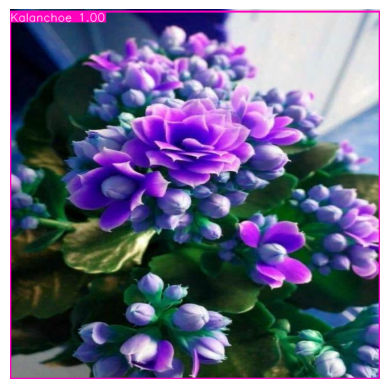

In [9]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Загрузка обученной модели
model = YOLO('/content/ultralytics/runs/detect/plants_detection/weights/best.pt')  # замените на путь к вашей обученной модели

# Путь к тестовому изображению
test_image_path = '/content/datasets/plants_project-6/test/images/Kalanchoe_110_jpg.rf.28284d7a911daba9db8e68b391b11dd5.jpg'

# Выполнение предсказания
results = model(test_image_path)

# Извлечение первого результата из списка
result = results[0]

# Отображение изображения с предсказанными объектами
plt.imshow(result.plot())  # Используем result.plot() для отображения предсказаний на изображении
plt.axis('off')
plt.show()
